# BIGDFT V NWCHEM

In [1]:
import numpy as np
# import constants as const
import matplotlib.pyplot as plt
import pandas as pd 
import pickle as pkl

In [2]:
Ha2eV = 27.211386245988

In [3]:
data = pkl.load(open('BigDFTvNWChem_data.pkl','rb'))
df = pd.DataFrame(data)
df

method molecule basis_set  E_type             E  CPU_time
0    NWChem    2CzPN       VDZ      s0 -39391.525005    124.30
1    NWChem    2CzPN       VDZ  HOMO-1     -5.475432       NaN
2    NWChem    2CzPN       VDZ    HOMO     -5.387033       NaN
3    NWChem    2CzPN       VDZ    LUMO     -3.261570       NaN
4    NWChem    2CzPN       VDZ  LUMO+1     -2.755172       NaN
..      ...      ...       ...     ...           ...       ...
184  BigDFT     PhCz      0.55    LUMO     -1.822960       NaN
185  BigDFT     PhCz      0.55  LUMO+1     -1.657705       NaN
186  BigDFT     PhCz      0.55      s0  -3716.763914     86.93
187  BigDFT     PhCz      0.55      s1  -3713.487945    106.68
188  BigDFT     PhCz      0.55      t1  -3713.599655    121.02

[189 rows x 6 columns]

In [4]:
nw_df = df.query("method == 'NWChem'")
bd_df = df.query("method == 'BigDFT'")

In [5]:
molecules = df['molecule'].unique()
nw_bas = nw_df['basis_set'].unique()[0:3]
bd_bas = bd_df['basis_set'].unique()[3:]
states = ['s0','s1','t1']
MOs = ['HOMO-1','HOMO','LUMO','LUMO+1']

In [6]:
img_dpi = 300

#### NWChem basis set convergence

### ABS Rel energy

2CzPN


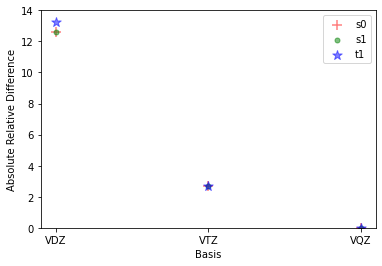

CBP


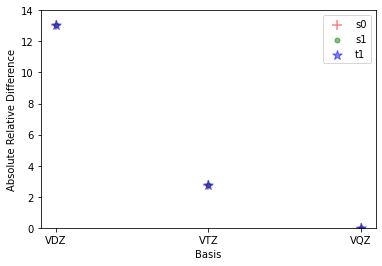

PhCz


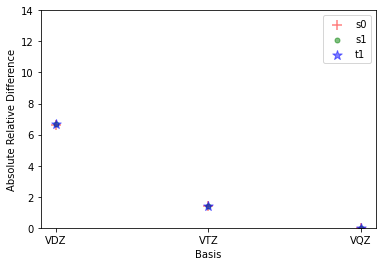

In [35]:
for mol in molecules:
    t_df = nw_df.query("molecule == @mol").dropna()
    
    # calculate relative differences
    vqz_energies = t_df.loc[t_df['basis_set'] == 'VQZ', ['E_type', 'E']]
    vqz_energies.columns = ['E_type', 'VQZ_E']
    t_df = pd.merge(t_df, vqz_energies, on='E_type')
    t_df['E_relative'] = t_df['E'] - t_df['VQZ_E']
    
    # Create a dictionary to map E_type to color and marker type
    e_type_dict = {'s0': {'color': 'red', 'marker': '+'},
               's1': {'color': 'green', 'marker': '.'},
               't1': {'color': 'blue', 'marker': '*'}}

    # create dictionary to map E_type to numerical values
    etype_map = {'s0': 0, 's1': 1, 't1': 2}
    t_df['E_type_num'] = t_df['E_type'].map(etype_map)
    # plot data
    fig, ax = plt.subplots()
    for e_type, group in t_df.groupby('E_type'):
        ax.scatter(group['basis_set'], group['E_relative'], color=e_type_dict[e_type]['color'], marker=e_type_dict[e_type]['marker'], s = 100,label=e_type,alpha=0.5)
    
    # Set the axis labels and legend
    ax.set_xlabel('Basis')
    ax.set_ylabel('Absolute Relative Difference')
    ax.legend()
    ax.set_ylim(0,14)

    print(mol)
    # Show the plot
    plt.savefig("Scatter_NWChem_arE_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

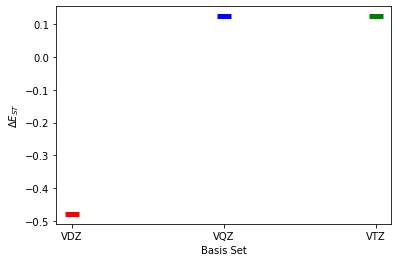

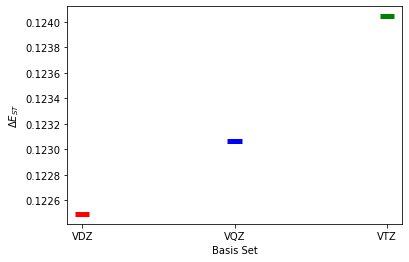

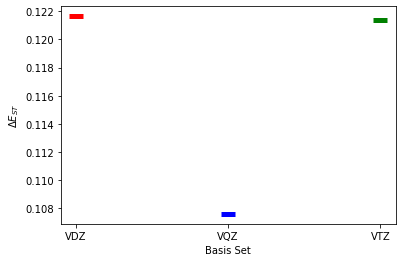

In [8]:
for mol in molecules:
    t_df = nw_df.dropna().query("molecule == @mol")
    
    # Filter the DataFrame to only include s1 and t1 values
    df_filtered = t_df[t_df['E_type'].isin(['s1', 't1'])]

    # Group the filtered DataFrame by basis_set and E_type, and calculate the difference between s1 and t1 values
    df_grouped = df_filtered.groupby(['basis_set', 'E_type']).agg({'E': 'mean'}).unstack()
    df_grouped['E_diff'] = df_grouped['E']['s1'] - df_grouped['E']['t1']
    df_grouped.reset_index(inplace=True)

    # Create a dictionary mapping each unique value in basis_set to a different color
#     color_dict = {basis_set: f'C{i}' for i, basis_set in enumerate(df_grouped['basis_set'].unique())}
    color_dict = {
    basis_set: {
        'VDZ': 'r',  # red
        'VTZ': 'g',  # green
        'VQZ': 'b',  # blue
    }[basis_set[-3:]]  # use last three characters of basis_set as key
    for basis_set in df_grouped['basis_set'].unique()
}
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df_grouped['basis_set'], df_grouped['E_diff'], c=df_grouped['basis_set'].map(color_dict),marker='_',s = 200,linewidth=5)

    # Set the axis labels and title
    ax.set_xlabel('Basis Set')
    ax.set_ylabel('$\Delta E_{ST}$')
#     ax.set_title('Scatter Plot of E(s1 - t1) vs. Basis Set')
    plt.savefig("Scatter_NWChem_DEST_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

In [257]:
nw_df.dropna().query("molecule == @mol")

method molecule basis_set E_type             E  CPU_time
0   NWChem    2CzPN       VDZ     s0 -39391.525005     124.3
5   NWChem    2CzPN       VDZ     s1 -39388.892767     116.8
6   NWChem    2CzPN       VDZ     t1 -39388.414966     331.6
7   NWChem    2CzPN       VTZ     s0 -39401.425731    1313.4
12  NWChem    2CzPN       VTZ     s1 -39398.823590    1115.8
13  NWChem    2CzPN       VTZ     t1 -39398.947031    2139.0
14  NWChem    2CzPN       VQZ     s0 -39404.107222   12836.4
19  NWChem    2CzPN       VQZ     s1 -39401.513290   11772.1
20  NWChem    2CzPN       VQZ     t1 -39401.636022   18246.8

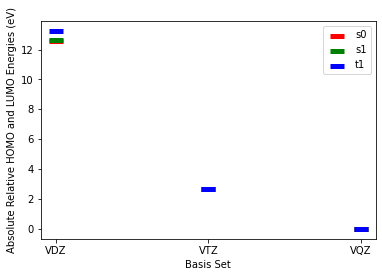

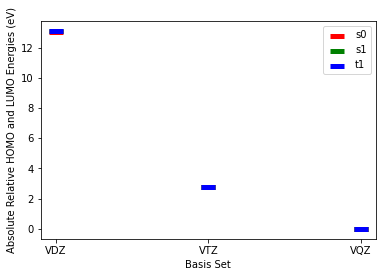

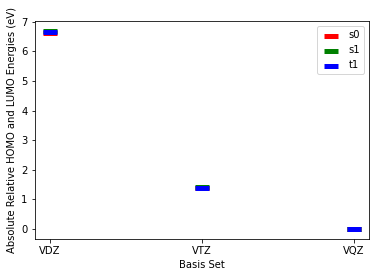

In [260]:
for mol in molecules:
    t_df = nw_df.dropna().query("molecule == @mol")
    # Get the relative energy for each E_type
    vqz_energies = t_df.loc[t_df['basis_set'] == 'VQZ', ['E_type', 'E']]
    vqz_energies.set_index('E_type', inplace=True)

    # Calculate the absolute relative energy for each E_type and basis_set
    t_df['abs_rel_E'] = t_df.apply(lambda row: abs(row['E'] - vqz_energies.loc[row['E_type'], 'E']), axis=1)
    fig, ax = plt.subplots()
    for e_type, group in t_df.groupby('E_type'):

        # Create a dictionary to map E_type to color and marker type
        e_type_dict = {'s0': 'red','s1': 'g','t1': 'b'}

        ax.scatter(group['basis_set'], group['abs_rel_E'], color=e_type_dict[e_type],label=e_type, marker = '_', s = 200, linewidth=5)
        plt.legend()
        
        # add labels to the x- and y-axes
    plt.xlabel('Basis Set')
    plt.ylabel('Absolute Relative HOMO and LUMO Energies (eV)')
#     plt.savefig("Scatter_NWChem_absrHL_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

In [273]:
t_df = nw_df.dropna().query("molecule == @mol")
t_df

method molecule basis_set E_type             E  CPU_time
0   NWChem    2CzPN       VDZ     s0 -39391.525005     124.3
5   NWChem    2CzPN       VDZ     s1 -39388.892767     116.8
6   NWChem    2CzPN       VDZ     t1 -39388.414966     331.6
7   NWChem    2CzPN       VTZ     s0 -39401.425731    1313.4
12  NWChem    2CzPN       VTZ     s1 -39398.823590    1115.8
13  NWChem    2CzPN       VTZ     t1 -39398.947031    2139.0
14  NWChem    2CzPN       VQZ     s0 -39404.107222   12836.4
19  NWChem    2CzPN       VQZ     s1 -39401.513290   11772.1
20  NWChem    2CzPN       VQZ     t1 -39401.636022   18246.8

# Absolute DEST

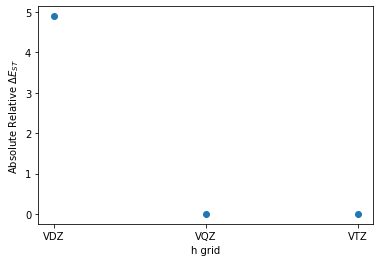

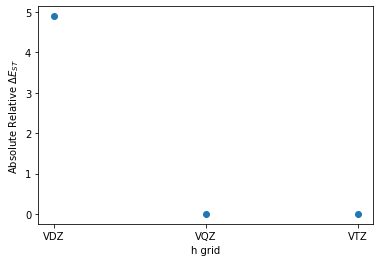

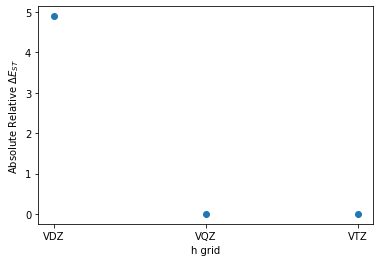

In [277]:
for mol in molecules:
    merged = t_df.loc[t_df['E_type'].isin(['s1', 't1'])].groupby(['basis_set']).apply(lambda x: x.loc[x['E_type'] == 's1', 'E'].values[0] - x.loc[x['E_type'] == 't1', 'E'].values[0]).reset_index(name='DEST')[['basis_set', 'DEST']]
    merged['rel_DEST'] = abs(merged['DEST'] / merged.loc[merged['basis_set'] == 'VQZ', 'DEST'].values[0] - 1)
    # create scatter plot
    plt.scatter(merged['basis_set'], merged['rel_DEST'])

    # add labels and title
    plt.xlabel('h grid')
    plt.ylabel('Absolute Relative $\Delta E_{ST}$')
#     plt.title('Relative DEST vs. Basis Set')

    # display plot
    plt.savefig("Scatter_NWChem_arDEST_hgrid_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

In [261]:
for mol in molecules:
    t_df = nw_df.dropna().query("molecule == @mol")
    # pivot the DataFrame to create separate columns for each E_type
    pivoted_df = t_df.pivot(index='basis_set', columns='E_type', values='E')
    # calculate the differences between E(s1) and E(s0), and between E(t1) and E(s0)
    pivoted_df['E(s1-s0)'] = pivoted_df['s1'] - pivoted_df['s0']
    pivoted_df['E(t1-s0)'] = pivoted_df['t1'] - pivoted_df['s0']

    # reset the index of the DataFrame
    pivoted_df = pivoted_df.reset_index()
    # Get the relative energy for each E_type
    vqz_energies = pivoted_df.loc[pivoted_df['basis_set'] == 'VQZ', ['E_type', 'E']]
    vqz_energies.set_index('E_type', inplace=True)

    # Calculate the absolute relative energy for each E_type and basis_set
    t_df['abs_rel_E'] = t_df.apply(lambda row: abs(row['E'] - vqz_energies.loc[row['E_type'], 'E']), axis=1)
    fig, ax = plt.subplots()
    for e_type, group in t_df.groupby('E_type'):

        # Create a dictionary to map E_type to color and marker type
        e_type_dict = {'s1': 'red','t1': 'b'}

        ax.scatter(group['basis_set'], group['abs_rel_E'], color=e_type_dict[e_type],label=e_type, marker = '_', s = 200, linewidth=5)
        plt.legend()
        
        # add labels to the x- and y-axes
    plt.xlabel('Basis Set')
    plt.ylabel('Absolute Relative HOMO and LUMO Energies (eV)')
#     plt.savefig("Scatter_NWChem_absrHL_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

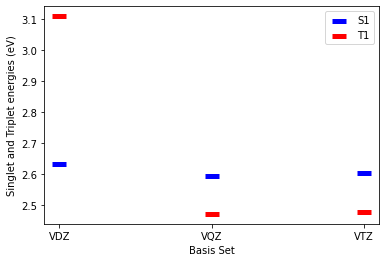

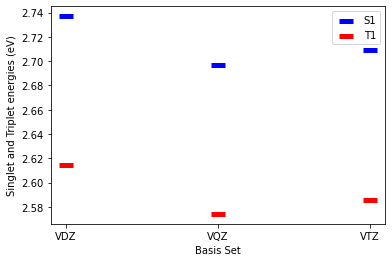

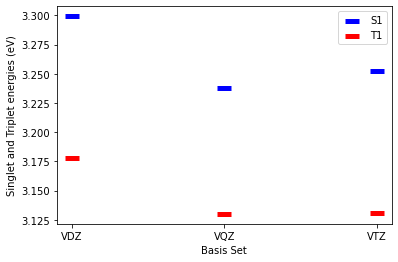

In [250]:
for mol in molecules:
    t_df = nw_df.dropna().query("molecule == @mol")
    # pivot the DataFrame to create separate columns for each E_type
    pivoted_df = t_df.pivot(index='basis_set', columns='E_type', values='E')
    # calculate the differences between E(s1) and E(s0), and between E(t1) and E(s0)
    pivoted_df['E(s1-s0)'] = pivoted_df['s1'] - pivoted_df['s0']
    pivoted_df['E(t1-s0)'] = pivoted_df['t1'] - pivoted_df['s0']

    # reset the index of the DataFrame
    pivoted_df = pivoted_df.reset_index()

    # create a scatter plot using seaborn
    sns.scatterplot(data=pivoted_df, x='basis_set', y='E(s1-s0)', label='S1', marker = '_', s = 200, linewidth=5,color='b')
    sns.scatterplot(data=pivoted_df, x='basis_set', y='E(t1-s0)', label='T1', marker = '_', s = 200, linewidth=5,color='r')

    # add labels to the x- and y-axes
    plt.xlabel('Basis Set')
    plt.ylabel('Singlet and Triplet energies (eV)')

    # show the plot
    plt.savefig("Scatter_NWChem_S1T1_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

## Absolute HOMO LUMO

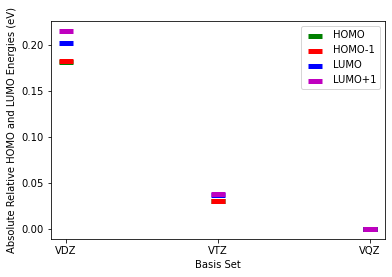

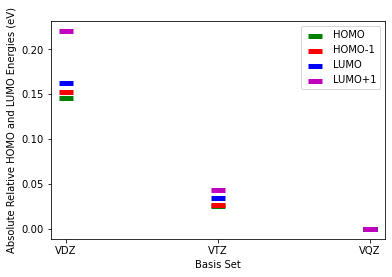

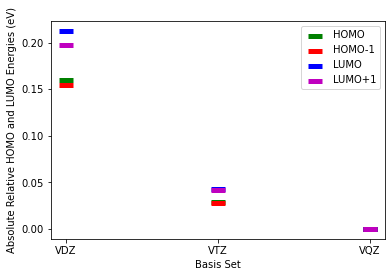

In [249]:
for mol in molecules:
    t_df = nw_df[nw_df.isna().any(axis=1)].query("molecule == @mol")
    # Get the relative energy for each E_type
    vqz_energies = t_df.loc[t_df['basis_set'] == 'VQZ', ['E_type', 'E']]
    vqz_energies.set_index('E_type', inplace=True)

    # Calculate the absolute relative energy for each E_type and basis_set
    t_df['abs_rel_E'] = t_df.apply(lambda row: abs(row['E'] - vqz_energies.loc[row['E_type'], 'E']), axis=1)
    fig, ax = plt.subplots()
    for e_type, group in t_df.groupby('E_type'):

        # Create a dictionary to map E_type to color and marker type
        e_type_dict = {'HOMO-1': 'red','HOMO': 'g','LUMO': 'b','LUMO+1': 'm'}

        ax.scatter(group['basis_set'], group['abs_rel_E'], color=e_type_dict[e_type],label=e_type, marker = '_', s = 200, linewidth=5)
        plt.legend()
        
        # add labels to the x- and y-axes
    plt.xlabel('Basis Set')
    plt.ylabel('Absolute Relative HOMO and LUMO Energies (eV)')
    plt.savefig("Scatter_NWChem_absrHL_cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

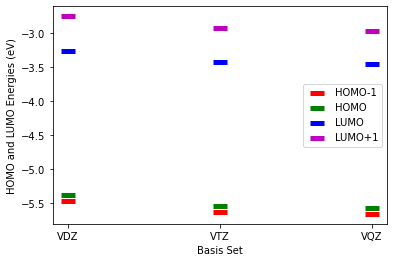

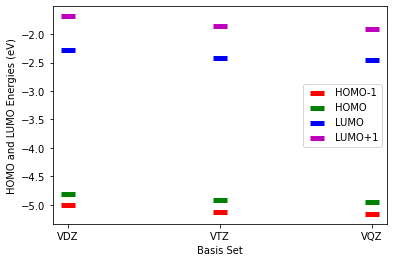

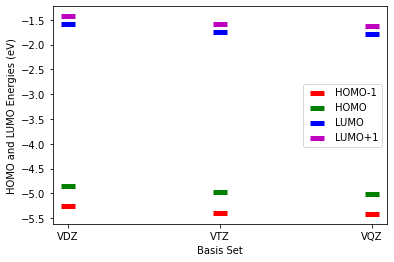

In [184]:
for mol in molecules:
    t_df = nw_df[nw_df.isna().any(axis=1)].query("molecule == @mol")
    
    # pivot the DataFrame to create separate columns for each E_type
    pivoted_df = t_df.pivot(index='basis_set', columns='E_type', values='E')

    # reset the index of the DataFrame
    pivoted_df = pivoted_df.reset_index()

    # set the color palette for the E_types
    colors = sns.color_palette(['red', 'green', 'blue', 'm'], n_colors=len(t_df['E_type'].unique()))

    # create a scatter plot using seaborn
    fig, ax = plt.subplots()
    for e_type, color in zip(t_df['E_type'].unique(), colors):
        label = e_type
        sns.scatterplot(data=t_df[t_df['E_type'] == e_type], x='basis_set', y='E', color=color, label=label, ax=ax,marker = '_', s = 200, linewidth=5)


    # add labels to the x- and y-axes
    plt.xlabel('Basis Set')
    plt.ylabel('HOMO and LUMO Energies (eV)')

    # show the plot
    plt.savefig("Scatter_NWChem__cc-pVnZ_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

## Graphs combine

# BIGDFT

# Absolute Relative energy comparison

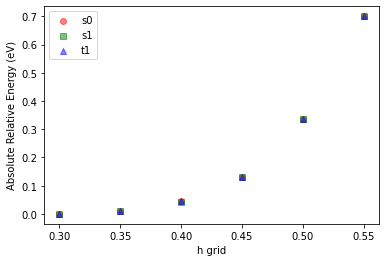

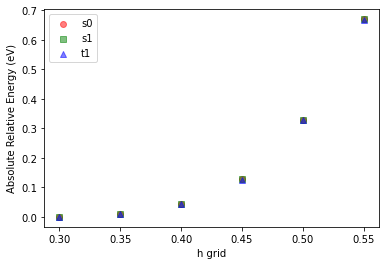

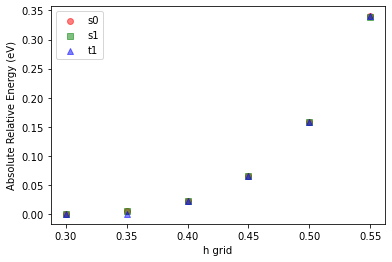

In [120]:
for mol in molecules:
    t_df = bd_df.dropna().query("molecule == @mol")
    # Define reference basis set
    ref_basis = '0.30'

    # Calculate absolute relative energy
    for e_type in t_df['E_type'].unique():
        ref_energy = t_df.loc[(t_df['basis_set'] == ref_basis) & (t_df['E_type'] == e_type), 'E'].iloc[0]
        t_df[f'E_rel_{e_type}'] = t_df.loc[t_df['E_type'] == e_type, 'E'] - ref_energy
        t_df[f'E_abs_{e_type}'] = abs(t_df[f'E_rel_{e_type}'])

    # Create the scatter plot
    fig, ax = plt.subplots()
    for e_type, marker, color in [('s0', 'o', 'r'), ('s1', 's', 'g'), ('t1', '^', 'b')]:
        ax.scatter(t_df['basis_set'], t_df[f'E_abs_{e_type}'], marker=marker, color=color, label=e_type,alpha=0.5)
    ax.set_xlabel('h grid')
    ax.set_ylabel('Absolute Relative Energy (eV)')
    ax.legend()
        # show the plot
    plt.savefig("Scatter_BigDFT_arE_hgrid_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

# Absolute energy comparison

# $\Delta E_{ST}$

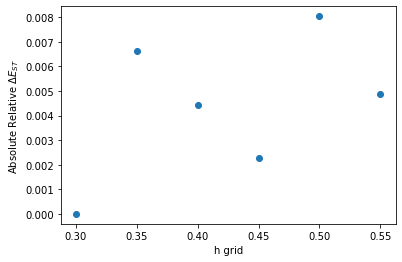

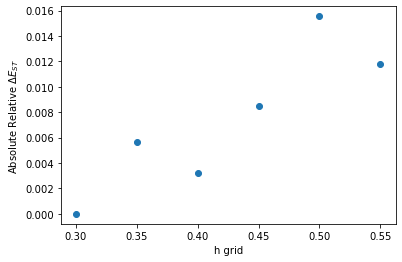

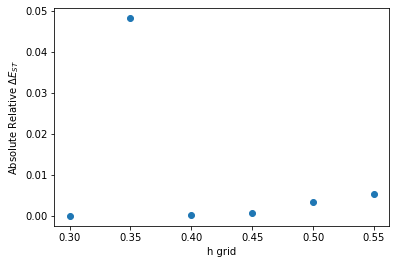

In [279]:
for mol in molecules:
    t_df = bd_df.dropna().query("molecule == @mol")
    merged = t_df.loc[t_df['E_type'].isin(['s1', 't1'])].groupby(['basis_set']).apply(lambda x: x.loc[x['E_type'] == 's1', 'E'].values[0] - x.loc[x['E_type'] == 't1', 'E'].values[0]).reset_index(name='DEST')[['basis_set', 'DEST']]
    merged['rel_DEST'] = abs(merged['DEST'] / merged.loc[merged['basis_set'] == '0.30', 'DEST'].values[0] - 1)
    # create scatter plot
    plt.scatter(merged['basis_set'], merged['rel_DEST'])

    # add labels and title
    plt.xlabel('h grid')
    plt.ylabel('Absolute Relative $\Delta E_{ST}$')
#     plt.title('Relative DEST vs. Basis Set')

    # display plot
    plt.savefig("Scatter_BigDFT_arDEST_hgrid_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

# HOMO LUMO

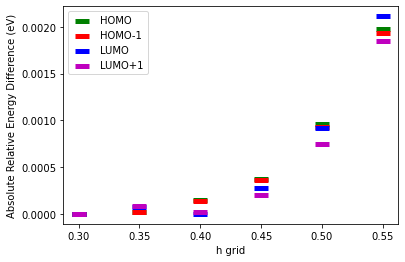

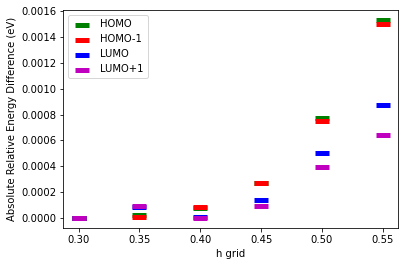

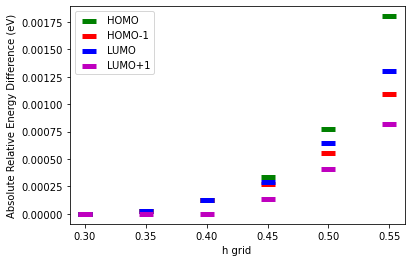

In [280]:
for mol in molecules:
    t_df = bd_df[bd_df.isna().any(axis=1)].query("molecule == @mol")
    # create a dictionary to store the E values with hgrid=0.30 for each E_type
    e_0_30 = {}
    for i in range(len(t_df)):
#         print(t_df['basis_set'][i])
        if t_df['basis_set'].values[i] == '0.30':
            e_0_30[t_df['E_type'].values[i]] = t_df['E'].values[i]

    # create a new column with E_0.30 values
    t_df['E_0.30'] = t_df['E_type'].apply(lambda x: e_0_30[x])

    # calculate the absolute difference between E and E_0.30 for the same E_type but different basis_set
    t_df['abs_diff'] = abs(t_df['E'] - t_df['E_0.30'])
    
    color_map = {'HOMO-1': 'red', 'HOMO': 'g', 'LUMO': 'b', 'LUMO+1': 'm'}

    # create the scatter plot
    fig, ax = plt.subplots()
    for etype, group in t_df.groupby('E_type'):
        ax.scatter(group['basis_set'], group['abs_diff'], c=color_map[etype], label=etype,marker = '_', s = 200, linewidth=5)

    # add labels and legend
    ax.set_xlabel('h grid')
    ax.set_ylabel('Absolute Relative Energy Difference (eV)')
    ax.legend(title='')

    # show the plot
    plt.savefig("Scatter_BigDFT_arHL_hgrid_basis_convergence_"+mol+".png",dpi =img_dpi)
    plt.show()

# CPU TIME Comparison

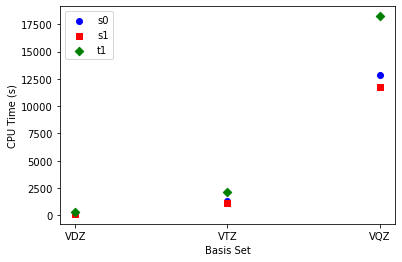

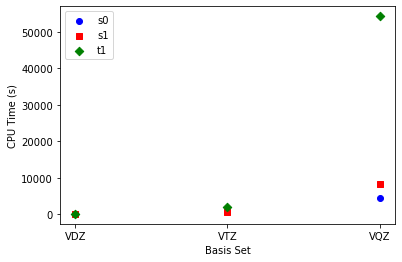

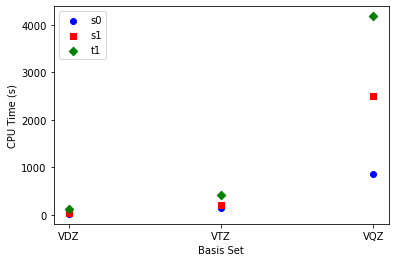

In [215]:
for mol in molecules:
    # Convert the data into a Pandas DataFrame
    t_df = nw_df.dropna().query('molecule == @mol')

    # Set the figure size
#     plt.figure(figsize=(10, 6))

    # Set the color map and marker map for the different E_type values
    colors = {'s0': 'blue', 's1': 'red', 't1': 'green'}
    markers = {'s0': 'o', 's1': 's', 't1': 'D'}

    # Plot the data
    for label, df in t_df.groupby('E_type'):
        plt.scatter(df['basis_set'], df['CPU_time'], color=colors[label], marker=markers[label], label=label)

    # Set the axis labels
    plt.xlabel('Basis Set')
    plt.ylabel('CPU Time (s)')

    # Set the title
#     plt.title('CPU Time vs Basis Set')

    # Add the legend
    plt.legend()

    plt.savefig("Scatter_NWChem_CPU_time_"+mol+".png",dpi =img_dpi)
    # Show the plot
    plt.show()

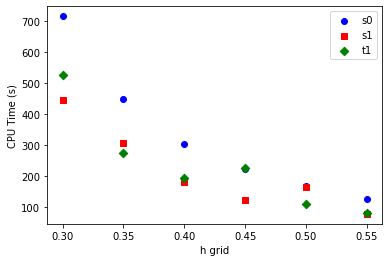

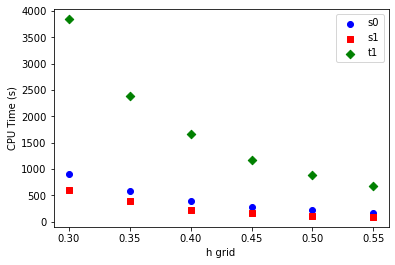

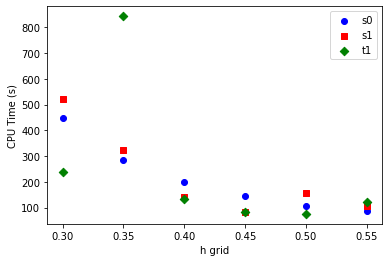

In [183]:
for mol in molecules:
    t_df = bd_df.dropna().query('molecule == @mol')
    
    # Create color map for E_type    
    
    color_map = {'s0': 'blue', 's1': 'red', 't1': 'green'}

    # Create marker map for E_type
    marker_map = {'s0': 'o', 's1': 's', 't1': 'D'}

    # Create scatter plot
    fig, ax = plt.subplots()
    for E_type, group in t_df.groupby('E_type'):
        ax.scatter(
            x=group['basis_set'], 
            y=group['CPU_time'], 
            label=E_type, 
            c=color_map[E_type], 
            marker=marker_map[E_type]
            )

    # Set plot properties
    ax.set_xlabel('h grid')
    ax.set_ylabel('CPU Time (s)')
#     ax.set_title('CPU Time vs Basis Set')
    ax.legend(loc='upper right')
    plt.savefig("Scatter_BigDFT_CPU_time_"+mol+".png",dpi =img_dpi)

    plt.show()

### Forces

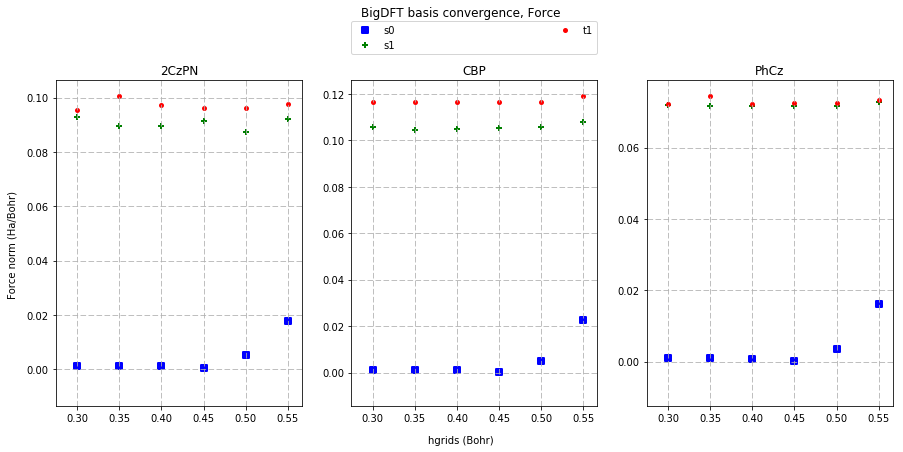

In [27]:
# log.log['Atomic Forces (Ha/Bohr)']

fig, axs = plt.subplots(1,3, figsize=(15,6))

i=0

for molecule in molecules:
    dests = []

    j = 0
        
    for bas in code_to_bas['BigDFT']:
        
        for state in states:
            
            bd_marker = marker.next()
            bd_color = colour.next()
            
            for hgrid in hgrids:

                force = data['BigDFT'][molecule][bas][hgrid][state]['forces']

                #remove legend (as the marker is the same for different basis size)
                if i == 1 and hgrid == hgrids[0]:
                    legend_label = state
                else:
                    legend_label = '_nolegend_'

                axs[i].scatter(hgrid, force, label = legend_label, marker = bd_marker, linewidth=2, color = bd_color)
                
                axs[1].legend(bbox_to_anchor=(0., 1.08, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
                axs[1].legend(bbox_to_anchor=(0., 1.08, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

                j = j + 1



    axs[i].set_title(molecule)
    axs[i].grid(linestyle='--')
    axs[i].grid(linestyle='--')


    i = 1 + i
        
fig.suptitle("BigDFT hgrid convergence with Force", y = 1.05 )    

#set common labels
fig.text(0.08, 0.5, "Force norm (Ha/Bohr)", va='center', rotation='vertical')
fig.text(0.5, 0.04, "hgrids (Bohr)", ha = "center")

plt.show()